# Dataset Exploration

## Imports

In [1]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [2]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [3]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.preprocessing import MinMaxScaler

## Load Data

In [4]:
categories_path = '../data/categories.npy'
data_path = '../data/training_data.npy'
valid_path = '../data/valid_periods.npy'
categories = np.load(categories_path, allow_pickle=True)
data = np.load(data_path, allow_pickle=True)
valid = np.load(valid_path, allow_pickle=True)
print('Data loaded')

Data loaded


## Values Inspection

In [5]:
print(f'categories: {categories.shape} , {type(categories)}, \ndata: {data.shape}, {type(data)}, \nvalid: {valid.shape}, {type(valid)}')

categories: (48000,) , <class 'numpy.ndarray'>, 
data: (48000, 2776), <class 'numpy.ndarray'>, 
valid: (48000, 2), <class 'numpy.ndarray'>


we have 3 sets of values:
-   **categories**: 48'000 observations
-   **data**: 48'000 observations, each one has 2776 points that ranges from 0 to 1
-   **valid**: possibly it's the valid interval to take into consideration in the time series in data

### See different values in categories

In [18]:
unique_categories = np.unique(categories)
unique_categories

array(['A', 'B', 'C', 'D', 'E', 'F'], dtype='<U1')

In [56]:
# print the frequency of each category
unique, counts = np.unique(categories, return_counts=True)
dict(zip(unique, counts))
print(f'unique: {unique}, \ncounts: {counts}')

unique: ['A' 'B' 'C' 'D' 'E' 'F'], 
counts: [ 5728 10987 10017 10016 10975   277]


## Plot Data

In [47]:
## plot a given sample from a dataset
def inspect_data(data, i):
    plt.figure(figsize=(17, 7))
    plt.plot(data[i])

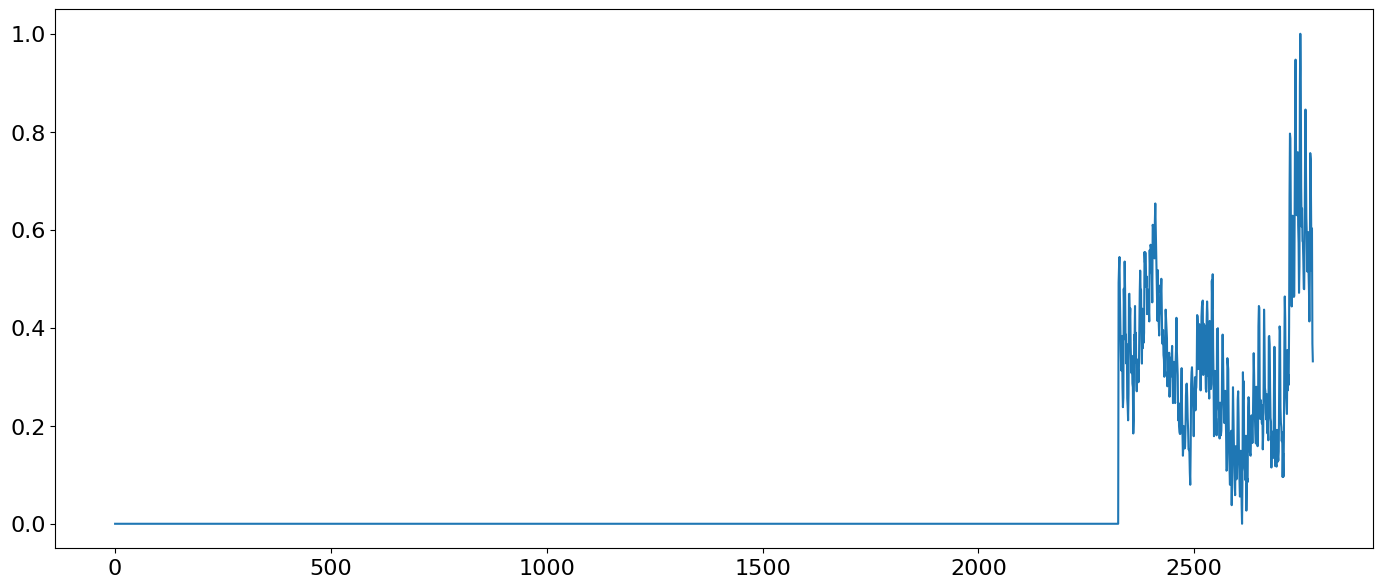

In [63]:
inspect_data(data, 0)

> !!! It seems that valid tells us what's the valid interval to take into consideration in data

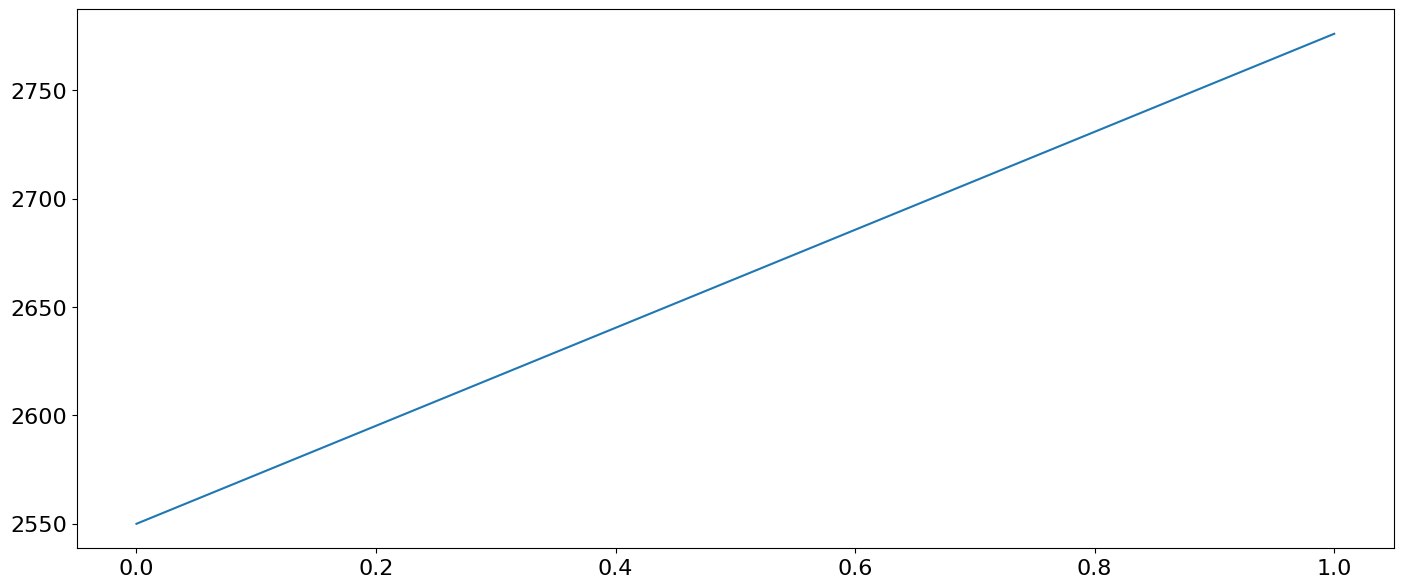

In [59]:
inspect_data(valid, 100)

In [106]:
def inspect_data_range(data, i):
    plt.figure(figsize=(17, 7))
    print(f'shape: {data[i].shape}')
    
    x_values = range(valid[i][0], valid[i][-1])
    print(f'actual shape: {len(x_values)}')
    # Plot the data starting from the first non-zero and ending at the end of the data
    plt.plot(x_values, data[i][valid[i][0]:valid[i][-1]])
    
    plt.show()

shape: (2776,)
actual shape: 94


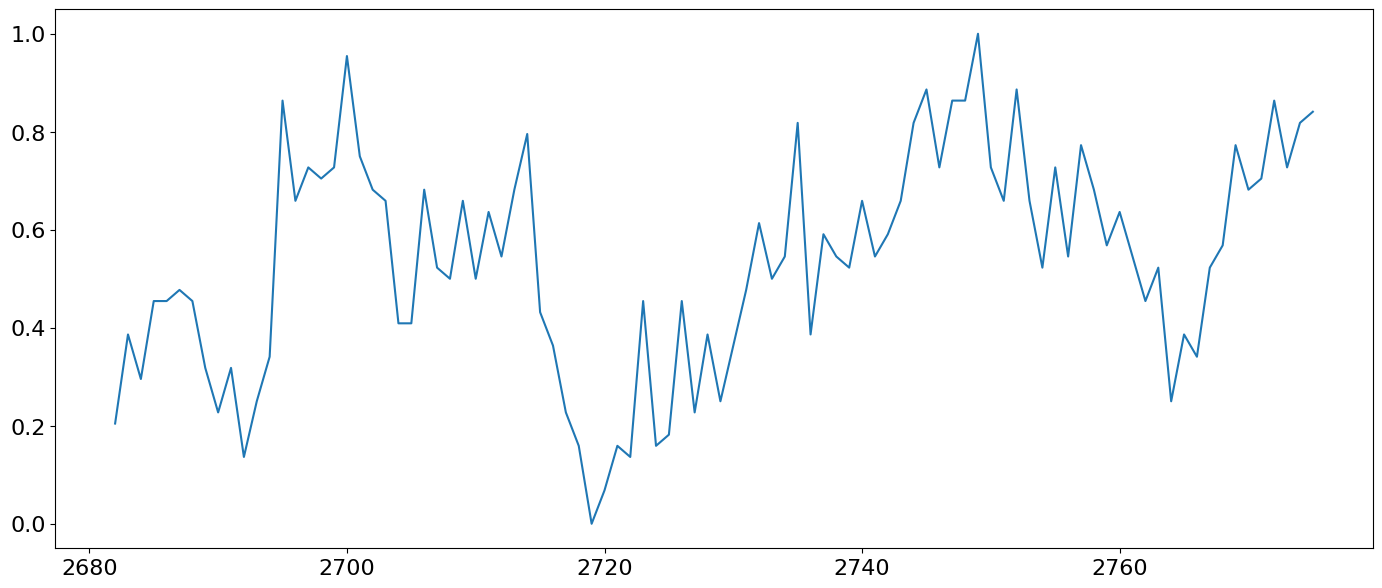

In [111]:
inspect_data_range(data, 4)

so we have different time-series with different lengths (try ```inspect_data_range(data, 4)``` and ```inspect_data_range(data, 0)```)